In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [127]:
dataFrame = pd.read_csv("data.csv")


In [129]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [130]:
dataFrame.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [131]:
dataFrame.corr()["price"].sort_values()

yr_renovated    -0.028774
yr_built         0.021857
condition        0.034915
sqft_lot         0.050451
waterfront       0.135648
floors           0.151461
bedrooms         0.200336
sqft_basement    0.210427
view             0.228504
bathrooms        0.327110
sqft_above       0.367570
sqft_living      0.430410
price            1.000000
Name: price, dtype: float64

In [132]:
dataFrame.isnull().sum()
dataFrame.isnull().sum().sum()

0

In [133]:
dataFrame = dataFrame.drop("date",axis=1)

In [134]:
dataFrame

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [135]:
dataFrame = dataFrame.drop(["street","city","statezip","country"],axis=1)

In [136]:
dataFrame

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [137]:
dataFrame.corr()["price"].sort_values()

yr_renovated    -0.028774
yr_built         0.021857
condition        0.034915
sqft_lot         0.050451
waterfront       0.135648
floors           0.151461
bedrooms         0.200336
sqft_basement    0.210427
view             0.228504
bathrooms        0.327110
sqft_above       0.367570
sqft_living      0.430410
price            1.000000
Name: price, dtype: float64

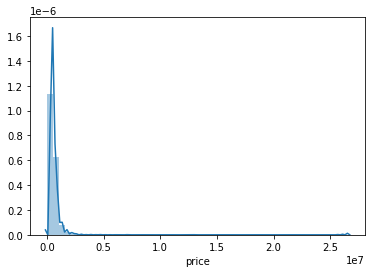

In [138]:
sbn.distplot(dataFrame["price"])

In [139]:
len(dataFrame)*0.1

460.0

In [140]:
dataFrameNN = dataFrame.sort_values("price",ascending=False).iloc[460:]

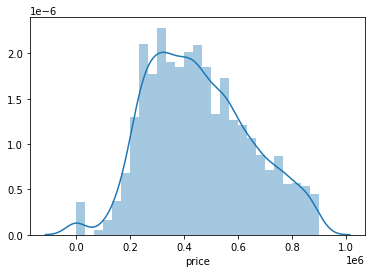

In [141]:
sbn.distplot(dataFrameNN["price"])

In [142]:
dataFrame = dataFrameNN

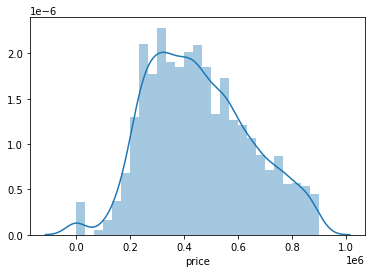

In [143]:
sbn.distplot(dataFrame["price"])

In [144]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=26)

In [146]:
scaler = MinMaxScaler()


In [147]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test),
earlyStopping= EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [148]:
model = Sequential()
model.add(Dense(30,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="binary_crossentropy")

In [149]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
71/87 [=======================>......] - ETA: 0s - loss: -3727136.0000WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'tuple'> input: (<tf.Tensor 'IteratorGetNext:0' shape=(None, 12) dtype=float32>,)
Consider rewriting this model with the Functional API.
87/87 [==============================] - 0s 3ms/step - loss: -4290137.5000 - val_loss: -6938523.0000
Epoch 2/100
87/87 [==============================] - 0s 2ms/step - loss: -6912041.5000 - val_loss: -6938523.0000
Epoch 3/100
87/87 [==============================] - 0s 2ms/step - loss: -6913418.0000 - val_loss: -6938523.0000
Epoch 4/100
87/87 [==============================] - 0s 2ms/step - loss: -6914370.5000 - val_loss: -6938523.0000
Epoch 5/100
87/87 [==============================] - 0s 2ms/step - loss: -6914399.5000 - val_loss: -6938523.0000
Epoch 6/100
87/87 [==============================] - 0s 2ms/step - loss: -6914471.0000 - val_loss: -6938523.0000
Epo

In [150]:
lossData = pd.DataFrame(model.history.history)

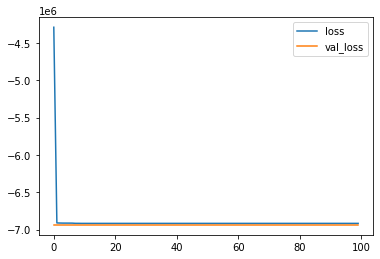

In [151]:
lossData.plot()

In [152]:
dataFrame.iloc[2]

price            900000.00
bedrooms              6.00
bathrooms             2.75
sqft_living        2300.00
sqft_lot          24773.00
floors                1.50
waterfront            0.00
view                  0.00
condition             4.00
sqft_above         2300.00
sqft_basement         0.00
yr_built           1950.00
yr_renovated       1985.00
Name: 1427, dtype: float64

In [153]:
yeniev = dataFrame.drop("price",axis=1).iloc[2]

In [154]:
yeniev = scaler.transform(yeniev.values.reshape(-1,12))

In [155]:
model.predict(yeniev)

array([[2.5679605]], dtype=float32)

In [156]:
guesses = model.predict(x_test)
mean_absolute_error(y_test,guesses)

Consider rewriting this model with the Functional API.


455006.4872193448

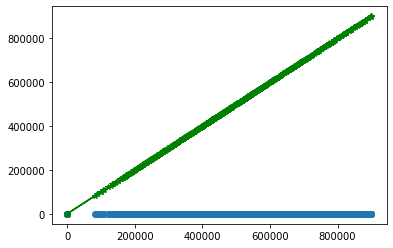

In [157]:
plt.scatter(y_test,guesses)
plt.plot(y_test,y_test,"g-*")